<a href="https://colab.research.google.com/github/Daivar/ML-models-training/blob/main/Classification(multi_class%2C_multi_label%2C_imbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.font_manager as font_manager
from matplotlib.pyplot import *
from matplotlib.font_manager import FontProperties

### https://realpython.com/logistic-regression-python/#multi-variate-logistic-regression

In [17]:
x, y = load_digits(return_X_y=True)
print(x, y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8]


In [18]:
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [20]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [21]:
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [22]:
x_test = scaler.transform(x_test)

In [23]:
y_pred = model.predict(x_test)

In [24]:
y_pred = model.predict(x_test)
print(y_pred)

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 9 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 1 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 7 8 0 1 5 2 5 3 4 1 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 7 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 7 7 6 7 6 5 6 0 8 8 9 3 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 3 7 2 7 8 5 5 7 5 3 2 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 1 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 6 7 2 0 9 6 0 4 2 0 7 5 8 5 7 8 2 8 4 3 7 2 6 8 1 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8]


In [25]:
model.score(x_test, y_test)


0.9416666666666667

In [26]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]])

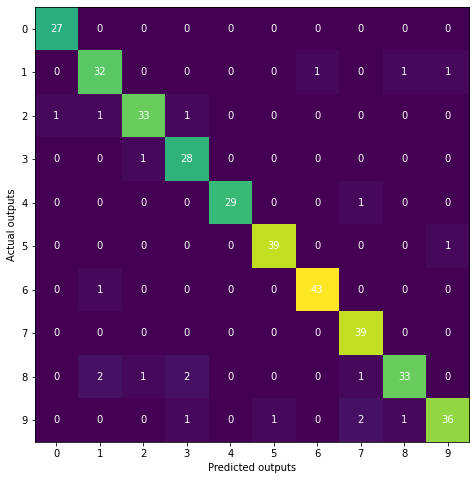

In [27]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs') #fontsize=font_size, color='black')
ax.set_ylabel('Actual outputs') #fontsize=font_size, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



### Multi-label classification

In [29]:
from sklearn.datasets import make_multilabel_classification

# this will generate a random multi-label dataset
X, y = make_multilabel_classification(sparse = True, n_labels=20, return_indicator = 'dense', allow_unlabeled = False)
# n_labels=20 - average number of labels per instance. More precisely, the number
# n_classes=5 

print(X.shape)
print(y.shape)

# y

(100, 20)
(100, 5)


In [30]:
!pip install scikit-multilearn

In [31]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.65

In [ ]:
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimators = { 
    'LR_C3': LogisticRegression(C=3, max_iter=10000), 
    'LR_C30': LogisticRegression(C=30, max_iter=10000), 
    'LR_C50': LogisticRegression(C=50, max_iter=10000), 
}

classifiers = { 
    'MLC': MultiOutputClassifier,
    'CChain': ClassifierChain,
    'LP':LabelPowerset
}

scores = {} 
for estimator in estimators:
  for classifier in classifiers:
    # print(f"{estimator} : {classifier} : {classifiers[classifier](estimators[estimator])}")
    classifiers[classifier](estimators[estimator])
    clf.fit(X_train, y_train)
    predictions = classifiers[classifier].predict(X_test)
    scores[f'{estimators[estimator] : classifiers[classifier]}'] = accuracy_score(y_test, predictions)

In [ ]:
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_multilabel_classification

X, y = make_multilabel_classification(sparse = True, n_labels=20, return_indicator = 'dense', allow_unlabeled = False)

# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# estimators = { 
#     'LR_C3': LogisticRegression(C=3, max_iter=10000), 
#     'LR_C30': LogisticRegression(C=30, max_iter=10000), 
#     'LR_C50': LogisticRegression(C=50, max_iter=10000), 
# }

estimators = { 
    'LR_C3': [LogisticRegression, 3, 10000],
    'LR_C30': [LogisticRegression, 30, 10000],
    'LR_C50': [LogisticRegression, 50, 10000] 
}

classifiers = { 
    'MLC': MultiOutputClassifier,
    'CChain': ClassifierChain,
    'LP' : LabelPowerset
}

scores = {} 
for estimator in estimators:
  for classifier in classifiers:
    # print(f"{estimator} : {classifier} : {classifiers[classifier](estimators[estimator])}")
    # print(estimators[estimator][1])
    # print(estimators[estimator][0]())
    est = estimators[estimator][0]
    C = estimators[estimator][1]
    iter = estimators[estimator][2]
    clf = classifiers[classifier](est(C=C, max_iter=iter))
    # # print(clf)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    scores[f'{estimator} : {classifier}'] = accuracy_score(y_test, predictions)


80
20


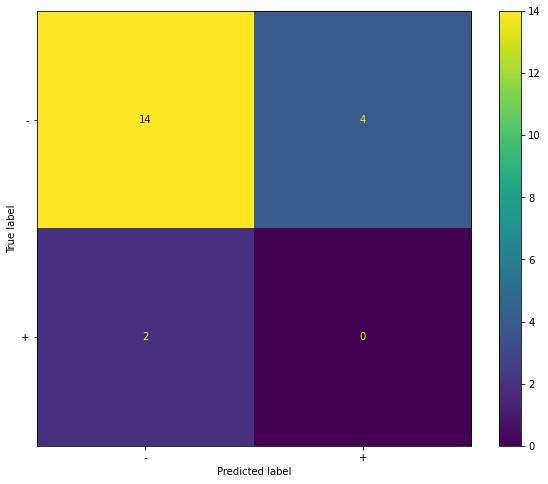

ACC: 0.7
ACC: 0.9
[0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.00      0.00      0.00         2

    accuracy                           0.70        20
   macro avg       0.44      0.39      0.41        20
weighted avg       0.79      0.70      0.74        20

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

n_samples = 100
n_classes = 2
class_weights = [0.8, 0.2]

X, Y = make_classification(n_samples=n_samples, n_classes=n_classes, n_informative=18, weights=class_weights)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(len(Y[Y == 0]))
print(len(Y[Y == 1]))
# print(Y)

# model
model = LogisticRegression(solver='newton-cg', random_state=42)
model.fit(X_train, y_train)


# eval
plt.rcParams["figure.figsize"] = (10,8)
cm = confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['-', '+'])
disp.plot()
plt.show()

print(f'ACC: {accuracy_score(y_test, model.predict(X_test))}')

# model that would guess only the oversampled category would have a very high accuracy
print(f'ACC: {accuracy_score(y_test, np.zeros(len(y_test)))}')

print(model.predict(X_test))
print(y_test)

# ... this is where classification report might help
print(classification_report(y_test, model.predict(X_test)))
print(classification_report(y_test,np.zeros(len(y_test))))

MWE Imbalance classification

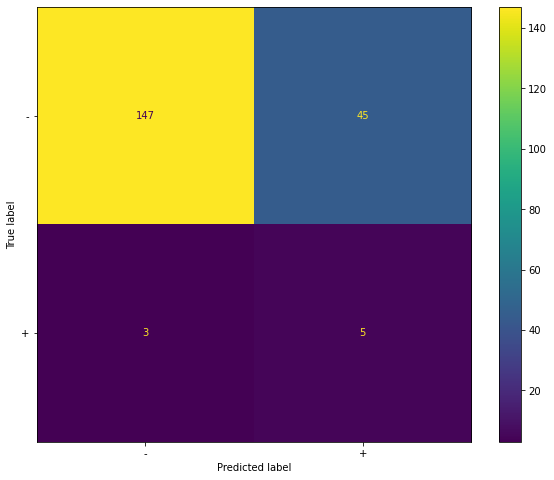

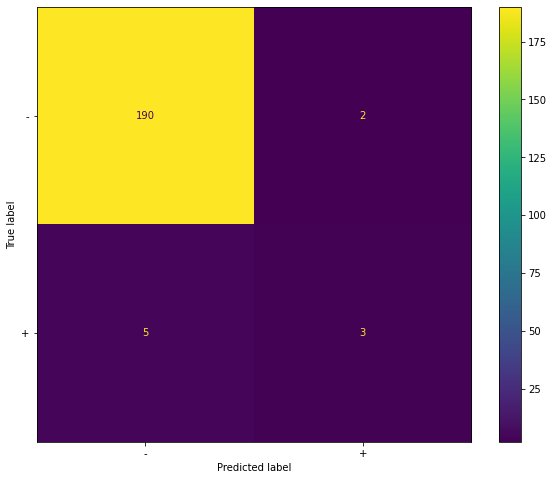

ACC: 0.76
ACC: 0.965


In [12]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

n_samples = 1000
n_classes = 2
class_weights = [0.95, 0.05]

X, Y = make_classification(n_samples=n_samples, n_classes=n_classes, n_informative=5, weights=class_weights)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model_balanced = LogisticRegression(solver='newton-cg', random_state=42, class_weight='balanced')
model_balanced.fit(X_train, y_train)

model_not_balanced = LogisticRegression(solver='newton-cg', random_state=42)
model_not_balanced.fit(X_train, y_train)

plt.rcParams["figure.figsize"] = (10,8)
cm = confusion_matrix(y_test, model_balanced.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['-', '+'])
disp.plot()
plt.show()

plt.rcParams["figure.figsize"] = (10,8)
cm = confusion_matrix(y_test, model_not_balanced.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['-', '+'])
disp.plot()
plt.show()

print(f'ACC: {accuracy_score(y_test, model_balanced.predict(X_test))}')
print(f'ACC: {accuracy_score(y_test, model_not_balanced.predict(X_test))}')